## Task 1
### Blue population table

| Blue                     	| Will use XAI 	| Will not use XAI 	| Total 	|
|--------------------------	|--------------	|------------------	|-------	|
| Enrolled in training     	| 60           	| 5               	| 65    	|
| not enrolled in training 	| 20            	| 15               	| 35    	|
| Total                    	| 80           	| 20               	| 100   	|


In [1]:
# Population split
blue = 0.9
red = 0.1

# Red: TP, TN, FP, FN
R = {
    'TP': 0.25,
    'TN': 0.25,
    'FP': 0.25,
    'FN': 0.25,
}

# Blue: TP, TN, FP, FN
B = {
    'TP': 0.6,
    'TN': 0.15,
    'FP': 0.05,
    'FN': 0.2,
}

### Task 1: 
Calculate the Demographic parity, equal opportunity and predictive rate parity coefficients for this decision rule.
### Starred task: 
How can this decision rule be changed to improve its fairness?

In [2]:
# Task 1
# demographic parity = P(Y=Enrolled in training|RED) / P(Y=Enrolled in training|BLUE)
demographic_parity = (R['TP'] + R['FP']) / (B['TP'] + B['FP'])
print(f'demographic_parity: {demographic_parity}')

# equal opportunity  = TPR_R / TPR_B
# TPR = TP/(TP + FN)
TPR_R = R['TP'] / (R['TP'] + R['FN'])
TPR_B = B['TP'] / (B['TP'] + B['FN'])

equal_opportunity = TPR_R / TPR_B
print(f'equal_opportunity: {equal_opportunity}')

# positive predictive rate parity = PPV_R / PPV_B
# PPV = TP/(TP + FP)
PPV_R = R['TP'] / (R['TP'] + R['FP'])
PPV_B = B['TP'] / (B['TP'] + B['FP'])

positive_predictive_rate_parity = PPV_R / PPV_B
print(f'positive_predictive_rate_parity: {positive_predictive_rate_parity}')

demographic_parity: 0.7692307692307692
equal_opportunity: 0.6666666666666667
positive_predictive_rate_parity: 0.5416666666666667


### Starred task
All of the metrics are out of range [80%; 125%] and lower than 80%. Firstly, we'd like to improve 2 lowest metrics:
- equal_opportunity
- positive_predictive_rate_parity

One way would be to increase number of False Negatives (at the cost of True Positives) and False Positives (at the cost of True Negatives).
Equal_opportunity) TPR_B is decreased and results in equal_opportunity increased.
Positive_predictive_rate_parity) PPV_B is decreased and results in positive_predictive_rate_parity increased.
A simple method would be to select enrollments equally randomly (50%/50%) for a subgroup of Blues. 

## Task 2

**Dataset**: UCI Adult: U.S. census data predicting an individual's income over $50K using demographic and financial details.

In [3]:
import os
os.chdir('fair_fairness_benchmark')
from benchmark.benchmark_tabular import load_dataset
os.chdir('benchmark')

/opt/miniconda3/envs/deepsenseai/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/miniconda3/envs/deepsenseai/lib/python3.10/site-packages/torchvision/image.so, 6): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: /opt/miniconda3/envs/deepsenseai/lib/python3.10/site-packages/torchvision/image.so
  Expected in: /opt/miniconda3/envs/deepsenseai/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
 in /opt/miniconda3/envs/deepsenseai/lib/python3.10/site-packages/torchvision/image.so'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [88]:
X, y, s = load_dataset("adult", "", "")
# X.drop(columns=['native-country'], inplace=True)
text_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

In [90]:
import pandas as pd
X_num = pd.get_dummies(X, columns=text_columns)

Model: logistic_regression
{'statistical_parity': 6.148347425057648, 'equal_opportunity': 1.109061273805497, 'predictive_parity_value': 1.0309643613758084, 'accuracy': 0.8473751713767635}


/opt/miniconda3/envs/deepsenseai/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


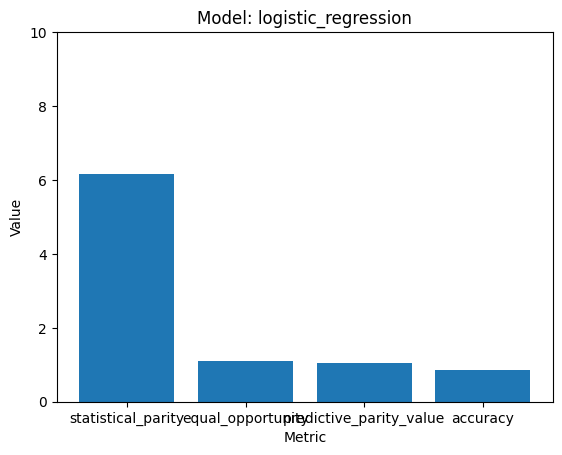

Model: decision_tree
{'statistical_parity': 6.598984771573604, 'equal_opportunity': 1.1230173275086093, 'predictive_parity_value': 0.9726483249110986, 'accuracy': 0.856330989341471}


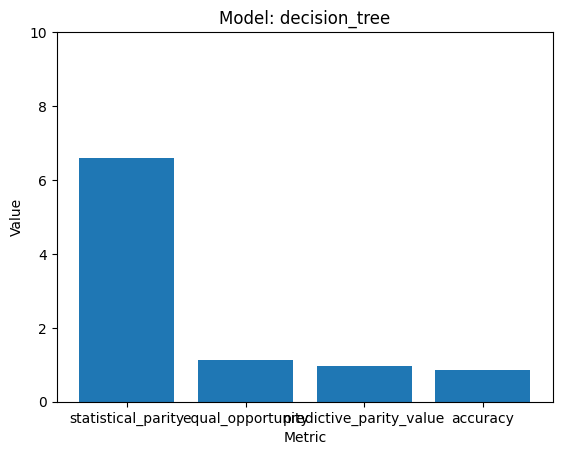

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

def compute_metrics(model, X, y, s):
    model.fit(X, y)
    y_pred = model.predict(X).flatten()
    s = np.array(s).flatten()

    y_pred_w = y_pred[s == 0]
    y_w = y[s == 0]
    y_pred_m = y_pred[s == 1]
    y_m = y[s == 1]

    woman = {
        'TP': np.sum((y_pred_w == 1) & (y_w == 1)),
        'FP': np.sum((y_pred_w == 1) & (y_w == 0)),
        'TN': np.sum((y_pred_w == 0) & (y_w == 0)),
        'FN': np.sum((y_pred_w == 0) & (y_w == 1))
    }

    man = {
        'TP': np.sum((y_pred_m == 1) & (y_m == 1)),
        'FP': np.sum((y_pred_m == 1) & (y_m == 0)),
        'TN': np.sum((y_pred_m == 0) & (y_m == 0)),
        'FN': np.sum((y_pred_m == 0) & (y_m == 1))
    }

    demographic_parity = (man['TP'] + man['FP']) / (woman['TP'] + woman['FP'])

    # equal opportunity  = TPR_R / TPR_B
    # TPR = TP/(TP + FN)
    TPR_M = man['TP'] / (man['TP'] + man['FN'])
    TPR_W = woman['TP'] / (woman['TP'] + woman['FN'])

    equal_opportunity = TPR_M / TPR_W

    # positive predictive rate parity = PPV_R / PPV_B
    # PPV = TP/(TP + FP)
    PPV_M = man['TP'] / (man['TP'] + man['FP'])
    PPV_W = woman['TP'] / (woman['TP'] + woman['FP'])

    positive_predictive_rate_parity = PPV_M / PPV_W

    return {
        'statistical_parity': demographic_parity,
        'equal_opportunity': equal_opportunity,
        'predictive_parity_value': positive_predictive_rate_parity,
        'accuracy': np.sum(y == y_pred)/len(y),
    }

def plot_bar_chart(model_name, model_metrics):
    plt.bar(model_metrics.keys(), model_metrics.values())
    plt.title(f"Model: {model_name}")
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.ylim((0, 10))
    plt.show()

models = [
    (LogisticRegression(max_iter=1000), 'logistic_regression'),
    (DecisionTreeClassifier(max_depth=8, min_samples_split=10), 'decision_tree'),
]

for model, name in models:
    model_metrics = compute_metrics(model, X_num, y, s)
    print(f"Model: {name}")
    print(model_metrics)
    plot_bar_chart(name, model_metrics)

Model: logistic_regression_class_balance
{'statistical_parity': 7.2668357933579335, 'equal_opportunity': 1.2459668124542336, 'predictive_parity_value': 0.9975159586242558, 'accuracy': 0.8211471746927735}


/opt/miniconda3/envs/deepsenseai/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


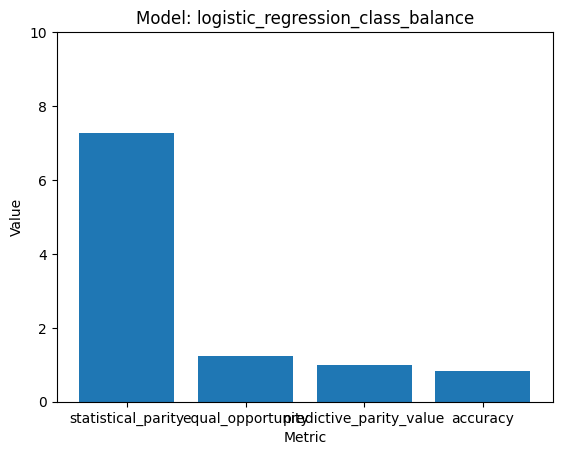

Model: decision_tree_balance
{'statistical_parity': 6.570269200316706, 'equal_opportunity': 1.1402367392518147, 'predictive_parity_value': 1.0096493978342287, 'accuracy': 0.8310254601046628}


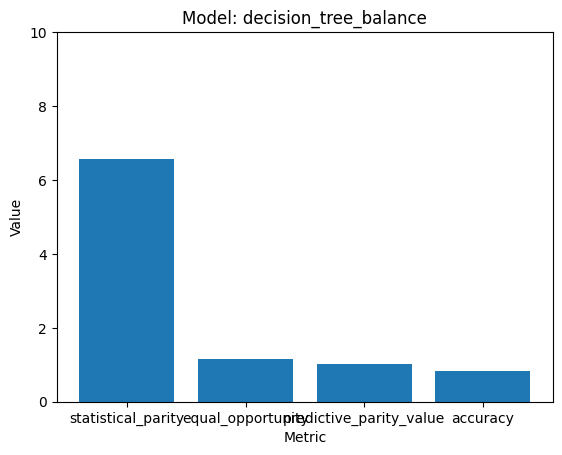

In [101]:
max_class_count = y.value_counts().max()
df_balanced = pd.concat([X_num, y, s], axis=1).groupby('target').sample(n=max_class_count, replace=True)
X_balanced = df_balanced.drop(columns=['target'])
y_balanced = df_balanced['target']
s_balanced = df_balanced['sex']

models = [
    (LogisticRegression(max_iter=1000), 'logistic_regression_class_balance'),
    (DecisionTreeClassifier(max_depth=8, min_samples_split=10), 'decision_tree_balance')
]

for model, name in models:
    model_metrics = compute_metrics(model, X_balanced, y_balanced, s_balanced)
    print(f"Model: {name}")
    print(model_metrics)
    plot_bar_chart(name, model_metrics)